# **Heart Disease Prediction using Machine Learning**
In this article, I'll introduce you to a machine learning project on heart disease prediction using the Python programming language. Heart disease is a leading cause of death worldwide, and early detection can save lives. This project aims to accurately predict heart disease using patient data, thereby aiding in early intervention, better resource allocation, and improved patient outcomes.


### **Predicting Heart Disease using Machine Learning**
In Google Colab, the combination of Matplotlib, Seaborn, NumPy, and Pandas streamlines data analysis and visualization tasks. Matplotlib and Seaborn offer versatile plotting options, while NumPy provides numerical computing capabilities. Pandas simplifies data manipulation, enabling efficient exploration and analysis within the cloud-based Python environment.

### **Purpose of the Project**
The Heart Disease Prediction project uses machine learning, data preprocessing, and user interfaces to offer accurate heart disease predictions. By analyzing factors such as patient age, blood pressure, cholesterol levels, and other health metrics with algorithms such as decision trees and random forests, it predicts the likelihood of heart disease. Through data preprocessing, it ensures high-quality inputs for model training. Patients input parameters like age, gender, blood pressure, and cholesterol levels, receiving tailored predictions. Integration of external data enriches the models, while visualization aids understanding. With scalability and continuous improvement, the project aims to enhance early detection and management of heart disease, improving patient outcomes and healthcare efficiency.

### **Module and Tool Initialization**
In this section, We are going to start this task by importing the necessary Python libraries that we need for this task.

In [1]:
#Importing all the necessary libraries required for the project

import numpy as np  # linear algebra
import matplotlib.pyplot as plt
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn

### **Data Preparation**
Now let's read the data and do some exploratory data analysis to understand this dataset properly.

In [2]:
data = pd.read_csv('/content/cardio_train.csv',sep=';')

Now let's print the dataset to inspect its contents and structure using the Python print function.
The dataset used in this project is the 'cardio_train.csv' file, which contains 70,000 rows and 13 columns

In [3]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1



### **Dropping Unnecessary Columns**

To streamline the dataset and remove irrelevant columns, we use the following function to drop the 'id' column, which is not needed for our analysis:

In [4]:
data = data.drop(['id'], axis=1)

### **Checking the Shape of the DataFrame**

To understand the structure of our dataset, we can check its shape, which returns the number of rows and columns in the DataFrame. This is useful for verifying the dimensions of the data after any preprocessing steps.

In [5]:
data.shape

(70000, 12)

### **Analyzing Target Variable Distribution**

To understand the distribution of the target variable, we can use the value_counts() function. This will give us the frequency of each unique value in the 'cardio' column, which indicates the presence or absence of heart disease.

In [6]:
data['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

### **Visualizing Target Variable Distribution**

To visualize the distribution of the target variable, we can use Seaborn's countplot function. This provides a graphical representation of the frequency of each unique value in the 'cardio' column.

<Axes: xlabel='cardio', ylabel='count'>

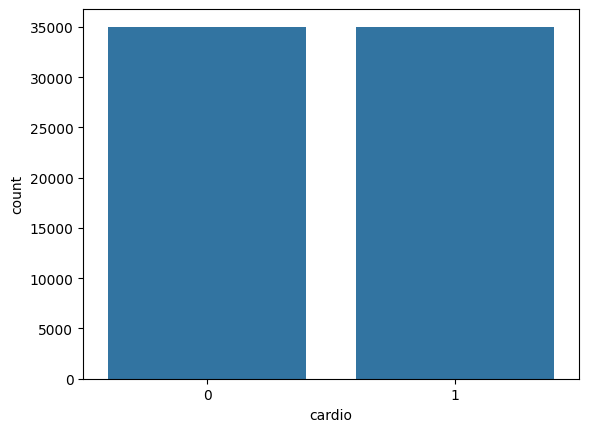

In [7]:
seaborn.countplot(x='cardio',data=data)


### **Checking for Missing Values**

To ensure the data's integrity, we can check for any missing values in the DataFrame. This is a crucial step in data preprocessing to identify and handle any incomplete data entries.

In [8]:
data.isnull().values.any()

False


### **Summarizing Missing Values**

To get a detailed summary of missing values in each column, we can use the `isna().sum()` function. This provides a count of missing values for each column in the DataFrame, helping to identify which columns require data cleaning.

In [9]:
data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### **Visualizing Gender Distribution with Heart Disease**

To visualize the relationship between gender and heart disease, we can use Seaborn's `countplot` function with the `hue` parameter set to 'cardio'. This will create a count plot showing the distribution of heart disease across different genders.


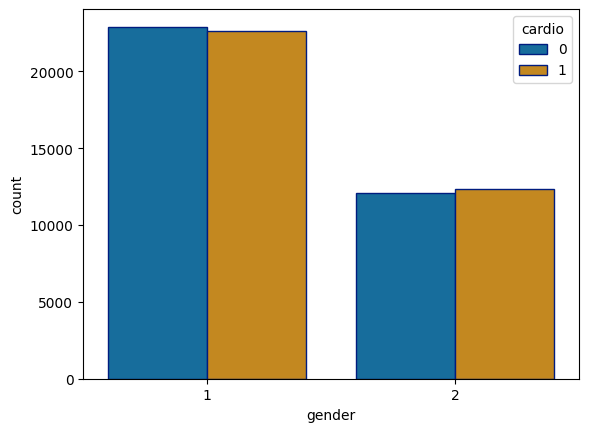

In [10]:
ax = seaborn.countplot(x='gender', hue='cardio', data=data, palette='colorblind', edgecolor=seaborn.color_palette('dark', n_colors=1)[0])

### **Visualizing Age Distribution with Heart Disease**

To visualize the relationship between age and heart disease, we can use Seaborn's `countplot` function with the `hue` parameter set to 'cardio'. This will create a count plot showing the distribution of heart disease across different age groups.

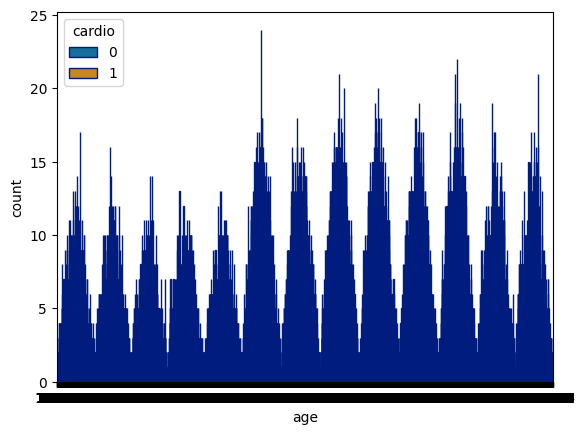

In [11]:
ax = seaborn.countplot(x='age', hue='cardio', data=data, palette='colorblind', edgecolor=seaborn.color_palette('dark', n_colors=1)[0])

### **Creating a New Age Column in Years**

To make the age data more interpretable, we can convert the age from days to years and create a new column `yr` in the DataFrame. This column will store the age rounded to the nearest whole number.

In [12]:
data['yr']=(data['age']/365).round(0)

In [13]:
data['yr']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: yr, Length: 70000, dtype: float64

### **Visualizing Age Distribution (in Years) with Heart Disease**

To visualize the relationship between age (in years) and heart disease, we can use Seaborn's `countplot` function with the `hue` parameter set to 'cardio'. This will create a count plot showing the distribution of heart disease across different age groups in years.


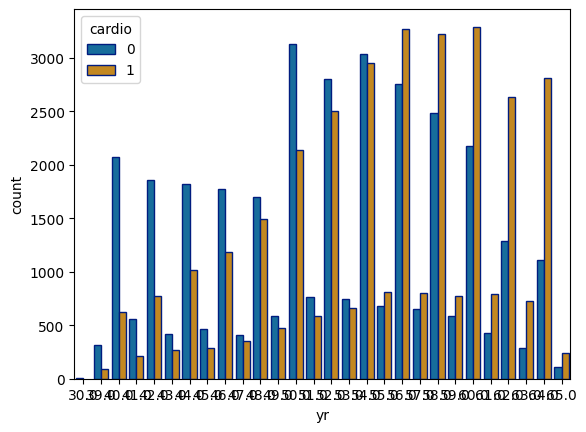

In [14]:
ax = seaborn.countplot(x='yr', hue='cardio', data=data, palette='colorblind', edgecolor=seaborn.color_palette('dark', n_colors=1)[0])

### **Generating Descriptive Statistics**

To get a summary of the statistical properties of the DataFrame, we can use the `describe()` function. This provides measures such as mean, standard deviation, minimum, and maximum values for each numeric column.

   

In [15]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


### **Computing Correlation Matrix**

To understand the relationships between different variables in the dataset, we can compute the correlation matrix using the `corr()` function. This matrix will show the pairwise correlation coefficients between the columns.


In [16]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,-0.029918


### **Selecting Features for the Model**
This line of code selects the features from the DataFrame `data` and assigns them to the variable `x`. It uses the `iloc` indexer to select all rows (`:`) and all columns except the last one (`:-1`) of the DataFrame. These selected columns represent the features that will be used to train the machine learning model.

In [17]:
data = data.drop(['yr'],axis =1)

In [18]:
x = data.iloc[:,:-1]


In [19]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


### **Selecting the Target Variable**
This line of code selects the target variable from the DataFrame `data` and assigns it to the variable `y`. It uses the `iloc` indexer to select all rows (`:`) and the 12th column (`11`, as indexing starts from 0) of the DataFrame, which corresponds to the target variable for the machine learning model.

In [20]:
y = data.iloc[:,11]

In [21]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64


### **Importing Train-Test Split Function**

To split the dataset into training and testing sets, we use the `train_test_split` function from the `sklearn.model_selection` module. This is a crucial step to evaluate the performance of the machine learning models.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.3,random_state=1)

In [24]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
23561,16136,2,169,71.0,100,80,1,1,1,0,1
34858,14615,1,158,69.0,140,80,2,1,0,0,1
54953,20507,1,164,65.0,120,80,1,1,0,0,1
59230,16720,1,153,53.0,100,60,1,1,0,0,1
1730,21050,1,159,71.0,140,90,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1
20609,19116,1,164,68.0,120,80,1,1,0,0,0
21440,18049,2,178,82.0,120,80,1,1,0,0,1
50057,21957,1,169,77.0,120,80,1,1,0,0,0


### **Importing the Random Forest Classifier**

To utilize the Random Forest algorithm for our heart disease prediction model, we need to import the `RandomForestClassifier` from the `sklearn.ensemble` module. This classifier is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the mode of the classes for classification.


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
Rclf = RandomForestClassifier()

In [27]:
Rclf.fit(xtrain,ytrain)

RandomForestClassifier()

### **Evaluating the Random Forest Classifier**

After training the Random Forest Classifier, we can evaluate its performance using the `score` method. This method returns the mean accuracy on the given test data and labels.


In [28]:
Rclf.score(xtest,ytest)

0.7163333333333334

### **Importing the Decision Tree Classifier**
This line imports the `DecisionTreeClassifier` class from the `sklearn.tree module`. This class is used to create a decision tree classifier object, which can be used to build a decision tree model for classification tasks.

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
Clf = DecisionTreeClassifier()

In [31]:
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

### **Evaluating the Decision Tree Classifier**

After training the Decision Tree Classifier, we can evaluate its performance using the `score` method. This method returns the mean accuracy on the given test data and labels.


In [32]:
Clf.score(xtest,ytest)

0.6326666666666667

### **Importing the Logistic Regression Model**
This line of code imports the `LogisticRegression` class from the `sklearn.linear_model` module. This class is used to create a logistic regression model object, which can be used for binary and multi-class classification tasks.

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
Lr = LogisticRegression()

In [35]:
Lr.fit(xtrain,ytrain)

LogisticRegression()

### **Evaluating the  Logistic Regression**

After training the  Logistic Regression, we can evaluate its performance using the `score` method. This method returns the mean accuracy on the given test data and labels.


In [36]:
Lr.score(xtest,ytest)

0.6963333333333334


### **Importing and Using the Support Vector Classifier**
This code snippet imports the Support Vector Classifier (SVC) class from the `sklearn.svm` module and uses it to create, train, and evaluate a support vector machine model.


In [37]:
from sklearn.svm import SVC
svm = SVC() # Create an instance of the SVC class
svm.fit(xtrain, ytrain) # Train the model on your training data
svm.score(xtest, ytest) # Now you can evaluate the model

0.6047142857142858

### **Importing and Using the K-Nearest Neighbors Classifier**
This code snippet imports the K-Nearest Neighbors Classifier (KNeighborsClassifier) class from the `sklearn.neighbors` module and uses it to create, train, and evaluate a KNN model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
knn.score(xtest, ytest)

0.6815238095238095

### **Importing and Using the Gaussian Naive Bayes Classifier**
This code snippet imports the Gaussian Naive Bayes (GaussianNB) class from the `sklearn.naive_bayes` module and uses it to create, train, and evaluate a Gaussian Naive Bayes model.

In [39]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)
nb.score(xtest, ytest)

0.581047619047619

### **Importing and Using the Decision Tree Classifier**
This code snippet imports the Decision Tree Classifier (DecisionTreeClassifier) class from the `sklearn.tree` module and uses it to create, train, and evaluate a Decision Tree model.

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt.score(xtest, ytest)

0.6319523809523809

### **Importing and Using the Gradient Boosting Classifier**
This code snippet imports the Gradient Boosting Classifier (GradientBoostingClassifier) class from the `sklearn.ensemble` module and uses it to create, train, and evaluate a Gradient Boosting model.

In [41]:
 from sklearn.ensemble import GradientBoostingClassifier
 gb = GradientBoostingClassifier()
 gb.fit(xtrain, ytrain)
 gb.score(xtest, ytest)


0.7352857142857143

### **Importing and Using the XGBoost Classifier**
This code snippet installs the XGBoost library, imports the XGBoost Classifier (XGBClassifier) class from the `xgboost` module, and uses it to create, train, and evaluate an XGBoost model.

In [42]:
!pip install xgboost  # Install xgboost library

from xgboost import XGBClassifier  # Import from the correct library
xgbc = XGBClassifier()
xgbc.fit(xtrain, ytrain)
xgbc.score(xtest, ytest)

0.7325238095238096

### **Importing and Using the AdaBoost Classifier**
This code snippet imports the AdaBoost Classifier (AdaBoostClassifier) class from the `sklearn.ensemble` module and uses it to create, train, and evaluate an AdaBoost model.

In [43]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()  # Create an AdaBoostClassifier instance
ada.fit(xtrain, ytrain)     # Train the model
ada.score(xtest, ytest)    # Evaluate the model

0.7293333333333333

### **Importing and Using the Gaussian Naive Bayes Classifier**
This code snippet imports the Gaussian Naive Bayes (GaussianNB) class from the `sklearn.naive_bayes` module and uses it to create, train, and evaluate a Gaussian Naive Bayes model.

In [44]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()  # Create a GaussianNB instance
nb.fit(xtrain, ytrain)  # Train the model using your training data
nb.score(xtest, ytest)  # Evaluate the model's performance on your test data

0.581047619047619

### **Importing and Using the Multi-layer Perceptron Classifier**
This code snippet imports the Multi-layer Perceptron classifier (MLPClassifier) class from the `sklearn.neural_network` module and uses it to create, train, and evaluate an MLP model.

In [45]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()  # Create an MLPClassifier instance
mlp.fit(xtrain, ytrain)  # Train the model using your training data
mlp.score(xtest, ytest)  # Evaluate the model's performance on your test data

0.6667142857142857

### **Visualizing Model Performance with a Confusion Matrix**
This code snippet uses a confusion matrix to visualize the performance of a trained machine learning model, in this case, a Support Vector Machine (SVM). It imports the necessary libraries ( `confusion_matrix ` from  `sklearn.metrics ` and  `seaborn ` for visualization), generates predictions on the test set using the trained model, and then creates a heatmap of the confusion matrix to display the model's performance in a visually intuitive way.

<Axes: >

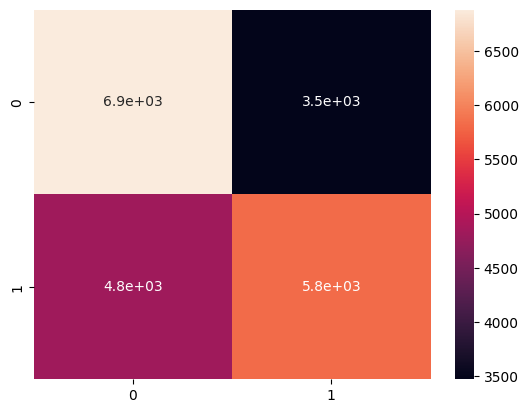

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'svm' is your fitted model
ypred = svm.predict(xtest)  # Get predictions from the model

cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True)